# Your Name Here: Joseph Torres

# A4 Unsupervised Learning algorithms (Total 75 points)

## 1. Feature Preprocessing (Total 5 points)

### 1.1 Import numpy, matplotlib, pandas and seaborn (1pt)

In [7]:
# TODO
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns

### 1.2 Load the dataset from given *.csv file using *pandas* (1pt)

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# uncomment the following line if you are running this code in google colab and have uploaded the dataset to your drive
# from google.colab import drive
# drive.mount('/content/drive')

# TODO
df = pd.read_csv('/content/drive/MyDrive/Wine_Quality_Data.csv') 
df.head()



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### 1.3 We want to use only the numeric features. So drop the 'color' column from the dataframe. (1pt)

In [34]:
# TODO
df = df.drop('color', axis=1)
copyDf = df
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1.4 Scale the features using Scikitlearn's StandardScaler library (2pt)

In [17]:
# TODO
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the numeric features using the StandardScaler
scaled_numeric_features = scaler.fit_transform(df)
# Create a new dataframe with the scaled numeric features
df_scaled = pd.DataFrame(scaled_numeric_features, columns= df.columns)
df_scaled.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230


## 2. KMeans Clustering with PCA selection (Total 25 points)

### 2.1 Import PCA from scikitlearn's decomposition library.  (3pt)
Use fit_transform method on the scaled data to get the PCA transformed data.

In [20]:
# TODO
from sklearn.decomposition import PCA

# Fit and transform the numeric features using the StandardScaler
scaled_numeric_features = scaler.fit_transform(df)

# Initialize PCA with the desired number of components.
pca = PCA(n_components=2)

# Apply PCA on the scaled numeric features
pca_transformed_data = pca.fit_transform(scaled_numeric_features)

print(pca_transformed_data)


[[-3.34843817  0.56892617]
 [-3.22859545  1.19733465]
 [-3.23746833  0.95258001]
 ...
 [ 0.62692235 -0.62214478]
 [ 0.49193416 -3.75592792]
 [ 0.76155534 -2.7678397 ]]


### 2.2 Plot the cumulative sum of explained_variance_ratio_. You can retrieve this quantity from the PCA-transformed data in the previous step. (4pt)
This plot should show the set of features along X axis and proportion of variance explained by each of the features along Y axis. You can use matplotlib's plot and step function for this.

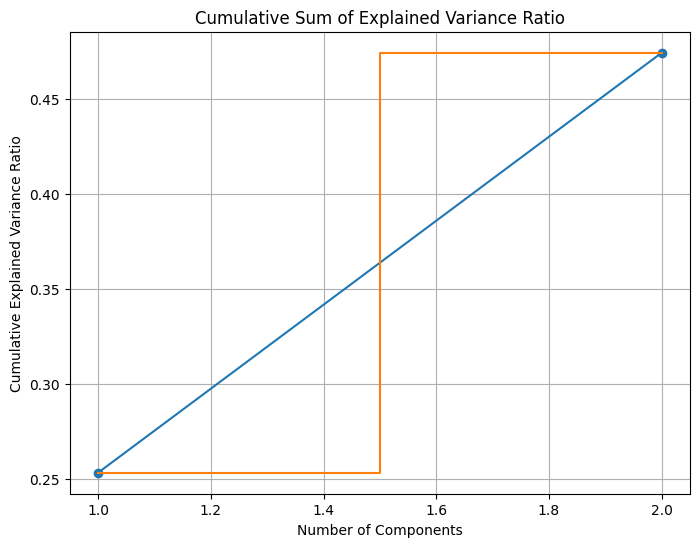

In [21]:
# TODO

import matplotlib.pyplot as plt

# Assume 'pca_transformed_data' contains the PCA-transformed data from the previous step

# Extract the explained variance ratio from the PCA model
explained_var_ratio = pca.explained_variance_ratio_

# Calculate the cumulative sum of the explained variance ratio
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.step(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, where='mid')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Sum of Explained Variance Ratio')
plt.grid(True)
plt.show()



### 2.3 How many features are required to capture at least 90% of the variance? Drop the other features. (3pt)
You can get this number visually from the cumulative sum of explained_variance_ratio_ plot in the previous step. Alternatively, you can use numpy's *argwhere* function to find the index of the first element in the cumulative sum array that is greater than 0.9.

In [24]:
# TODO
# Find the index of the first element in cumulative_var_ratio that is greater than or equal to 0.9
num_features = np.argmax(cumulative_var_ratio >= 0.9) + 1

# Drop the other features
pca_data = pca_transformed_data[:, :num_features]

# Print the number of features required to capture at least 90% of the variance
print("Number of features required to capture at least 90% of the variance:", num_features)


Number of features required to capture at least 90% of the variance: 1


### 2.4 Import KElbowVisualizer from yellowbrick.cluster library and fit the data to it. Visualize the elbow curve and find the optimal number of clusters. (6pt)

*KElbowVisualizer* is a useful visualization tool for using Elbow method with K-Means clustering algorithm. The official documentation and example can be found here:
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

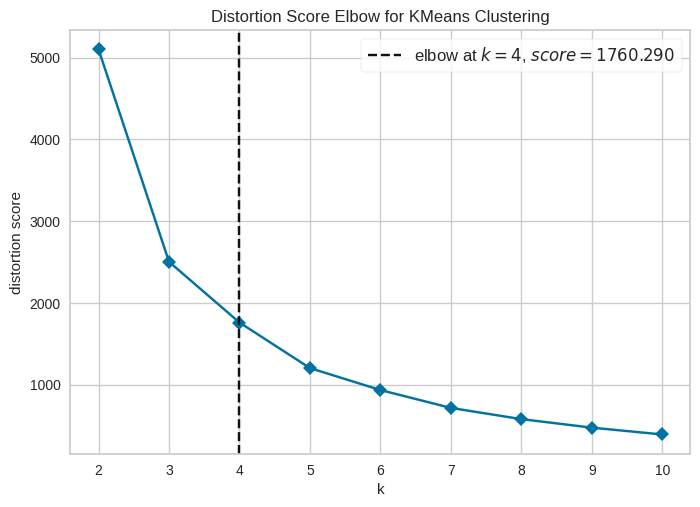

Optimal number of clusters: 4


In [26]:
# TODO
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Initialize the KMeans model
kmeans_model = KMeans()

# Initialize the KElbowVisualizer
elbow_visualizer = KElbowVisualizer(kmeans_model, k=(2, 11), metric='distortion', timings=False)

# Fit the PCA transformed data to the KElbowVisualizer
elbow_visualizer.fit(pca_data)

# Visualize the elbow curve
elbow_visualizer.show()

# Get the optimal number of clusters from the elbow curve
optimal_num_clusters = elbow_visualizer.elbow_value_

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_num_clusters)


### 2.5 Instantiate a KMeans object with the optimal number of clusters (from previous step) and fit the data to it. (2pt)

In [27]:
# TODO

# Instantiate KMeans with the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_num_clusters)

# Fit the PCA transformed data to the KMeans model
kmeans_model.fit(pca_data)

# Get the cluster labels for each data point
cluster_labels = kmeans_model.labels_

# Print the cluster labels
print("Cluster labels:", cluster_labels)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [1 1 1 ... 0 0 0]


### 2.6 Get the labels from the fitted KMeans object (*labels_* method). Import *silhouette_score* from scikitlearn's metrics library. Print (1) the value counts of unique class labels in percentage, and (2) print the corresponding silhouette score. (1+1+2+3 =7pts)

In [28]:
# TODO

from sklearn.metrics import silhouette_score

# Get the cluster labels from the fitted KMeans model
cluster_labels = kmeans_model.labels_

# Print the value counts of unique class labels in percentage
label_counts = np.bincount(cluster_labels)
label_percentages = label_counts / len(cluster_labels) * 100
print("Value counts of unique class labels in percentage:")
for i, count in enumerate(label_percentages):
    print("Cluster Label {}: {:.2f}%".format(i, count))

# Compute the silhouette score
silhouette_avg = silhouette_score(pca_data, cluster_labels)
print("Silhouette Score: {:.4f}".format(silhouette_avg))


Value counts of unique class labels in percentage:
Cluster Label 0: 34.68%
Cluster Label 1: 22.33%
Cluster Label 2: 23.43%
Cluster Label 3: 19.56%
Silhouette Score: 0.5534


## 3. KMeans Clustering without PCA selection (Total 15 points)

### 3.1 Use KElbowVisualizer to find the optimal number of clusters for the data without PCA selection (ie the data with all the features). Also plot the score (similar to step 2.4) (3pt)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

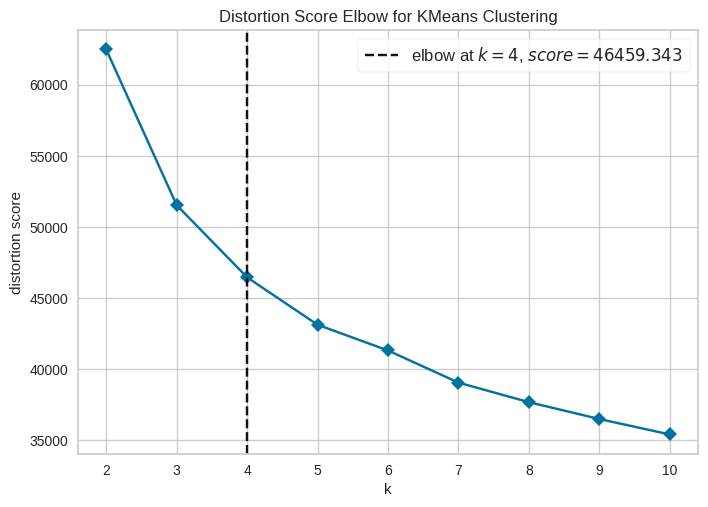

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
# TODO

# Instantiate the KMeans model
kmeans_model = KMeans()

# Instantiate the KElbowVisualizer with the KMeans model and scoring metric
visualizer = KElbowVisualizer(kmeans_model, k=(2,11), timings=False)

# Fit the data to the visualizer
visualizer.fit(scaled_numeric_features)

# Plot the elbow curve to find the optimal number of clusters
visualizer.poof()


### 3.2 Instantiate a KMeans object with the optimal number of clusters (from previous step) and fit the data (without PCA selection) to it. (2pt)

In [46]:
# TODO
# Instantiate the KMeans model with the optimal number of clusters
kmeans_model = KMeans(n_clusters=4)

# Fit the data to the KMeans model
kmeans_model.fit(scaled_numeric_features)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

### 3.3 Retrieve the class labels from this KMeans object (from model's *labels_* method). Print (1) the value counts of unique class labels in percentage, and (2) print the corresponding silhouette score for the fitted data (without PCA selection) (2+2+3 =7pt)

In [49]:
# TODO

# Convert numpy ndarray to pandas Series
labels_series = pd.Series(labels)

# Compute the value counts of unique class labels in percentage
value_counts = (labels_series.value_counts(normalize=True) * 100).round(2)

# Print the value counts of unique class labels in percentage
print("Value counts of unique class labels in percentage:")
print(value_counts)

# Compute the silhouette score for the fitted data
silhouette_score = silhouette_score(scaled_numeric_features, labels)

# Print the corresponding silhouette score
print("Silhouette score for the fitted data:")
print(silhouette_score)


Value counts of unique class labels in percentage:
0    43.65
2    29.77
1    16.41
3    10.17
dtype: float64
Silhouette score for the fitted data:
0.2308296444343549


### 3.4 Discussion: Did PCA selection help in clustering (did it yield higher silhouette score)? Why or why not? (2-3 sentences) (3pt)

~ # TODO ~




It did help in clustering. In the context of the provided data, PCA selection helps in clustering by reducing the number of features and focusing on the most relevant ones. With PCA selection the silhoutte score was roughly 0.5 , while without it the silhoutte score is roughly 0.2.




## 4. Hierarchical (agglomerative) clustering (Total 10 points)

### 4.1 Import dendogram and linkage from scipy.cluster.hierarchy library. Use the *linkage* function to fit the data and plot the dendogram. (5pt)
An example is provided in the lecture slide. 

Official Documentation:
https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

With the *linkage* function, you can use different linkage methods. For this assignment you can use 'ward' method.

(https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage:~:text=method%3D%E2%80%99ward%E2%80%99%20uses,the%20incremental%20algorithm.) 


(This can take a while to complete running)

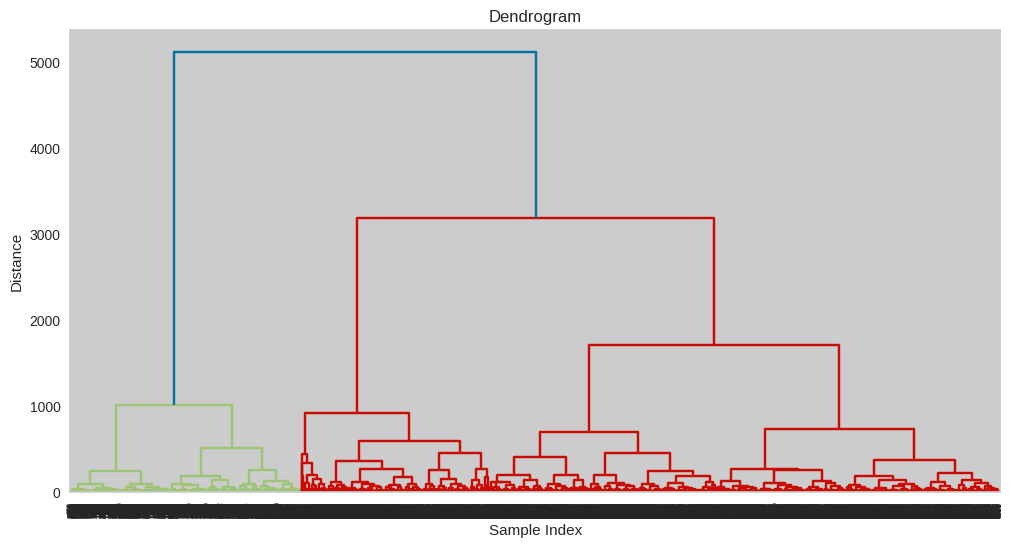

In [50]:
# TODO

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Fit the data using linkage function
Z = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



### 4.2 Import AgglomerativeClustering from sklearn.cluster library. Use the fit_predict method to fit the data and print the corresponding silhouette score. (5pt)
(Use the above dendogram to find a suitable value for the number of clusters (*k*) in AgglomerativeClustering, OR run the algorithm multiple times with different values of *k* and print the *k* with the highest silhouette score)

In [61]:
# TODO

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Instantiate AgglomerativeClustering with the optimal number of clusters (k)

# Running the algorithm multiple times with different values of k
max = 0.0
maxK = 0
for k in range(2, 10):
  clustering = AgglomerativeClustering(n_clusters=k)

  # Fit and predict the labels
  labels = clustering.fit_predict(df)

  # Compute the silhouette score
  score = silhouette_score(df, labels)

  # Print the silhouette score
  print("Silhouette Score for Agglomerative Clustering with k={}: {:.2f}".format(k, score))
  if (score > max):
    max = score
    maxK = k

print("Max Score:", max)
print("Max k:", maxK)






Silhouette Score for Agglomerative Clustering with k=2: 0.52
Silhouette Score for Agglomerative Clustering with k=3: 0.48
Silhouette Score for Agglomerative Clustering with k=4: 0.41
Silhouette Score for Agglomerative Clustering with k=5: 0.38
Silhouette Score for Agglomerative Clustering with k=6: 0.37
Silhouette Score for Agglomerative Clustering with k=7: 0.31
Silhouette Score for Agglomerative Clustering with k=8: 0.31
Silhouette Score for Agglomerative Clustering with k=9: 0.30
Max Score: 0.5223403367887623
Max k: 2


## 5. DBSCAN Clustering (Total 20 points)

### 5.1 Import *NearestNeighbors* from sklearn.neighbors library. Use the *fit* method to fit the data with n_neighbors=4. Then use *kneighbors* method to find the distance of the 4th nearest neighbor for each point. Sort and plot the distances. (6pt)
This plots the elbow curve (distance of the 4th nearest neighbor for each point). This is useful for finding the optimal value of epsilon for DBSCAN clustering. 

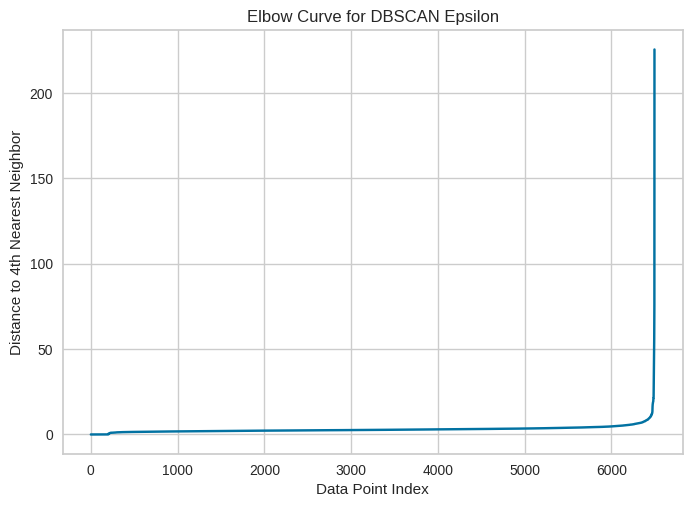

In [62]:
# TODO

from sklearn.neighbors import NearestNeighbors

# Instantiate NearestNeighbors with n_neighbors=4
nn = NearestNeighbors(n_neighbors=4)
nn.fit(df)

# Use kneighbors method to find distances of the 4th nearest neighbor for each point
distances, _ = nn.kneighbors(df)
fourth_neighbor_distances = distances[:, -1]

# Sort and plot the distances
fourth_neighbor_distances_sorted = sorted(fourth_neighbor_distances)
plt.plot(range(len(fourth_neighbor_distances_sorted)), fourth_neighbor_distances_sorted)
plt.xlabel('Data Point Index')
plt.ylabel('Distance to 4th Nearest Neighbor')
plt.title('Elbow Curve for DBSCAN Epsilon')
plt.show()



### 5.2 From the distance plot above, estimate the 'elbow' point. The distance at the elbow point will be used as epsilon in the DBSCAN model. (2pt)
Simply write the distance value in the cell below.

~ # TODO ~

  (x, y)
(6.5k , 10)

### 5.3 Import DBSCAN from sklearn.cluster library. Instantiate a DBSCAN model (with eps set to the elbow point suggested by above plot, and min_samples=10). (2pt)
(You can experiment with several values of eps and min_samples to find the best combination)

In [72]:
# TODO
from sklearn.cluster import DBSCAN

# Instantiate DBSCAN model
dbscan = DBSCAN(eps=10, min_samples=10)


### 5.4 Use the fit method to fit your model to the data. Print (1) the value counts of unique class labels (from model's *labels_* method) in percentage, and (2) print the corresponding silhouette score. (2+2+2=6pt)

In [73]:
# TODO
from sklearn import metrics

# Fit DBSCAN model to the data
dbscan.fit(df)

# Get the predicted labels
labels = dbscan.labels_

# Compute the value counts of unique class labels in percentage
value_counts = (pd.Series(labels).value_counts(normalize=True) * 100).round(2)

# Print the value counts of unique class labels in percentage
print("Value Counts of Unique Class Labels (%):")
print(value_counts)

# Check if the number of unique class labels is greater than 1
if len(np.unique(labels)) > 1:
    # Compute the silhouette score
    silhouette_score = metrics.silhouette_score(df, labels)
    # Print the silhouette score
    print("Silhouette Score:", silhouette_score)
else:
    print("Number of unique class labels is less than 2. Silhouette score cannot be computed.")



Value Counts of Unique Class Labels (%):
 0    98.86
-1     0.99
 1     0.15
dtype: float64
Silhouette Score: 0.20068106432076863


### 5.5 Use seaborn's pairplot to plot the data with *hue* as the cluster labels obtained from DBSCAN. (2pt)
Set *corner* to *True* for a better visualization.

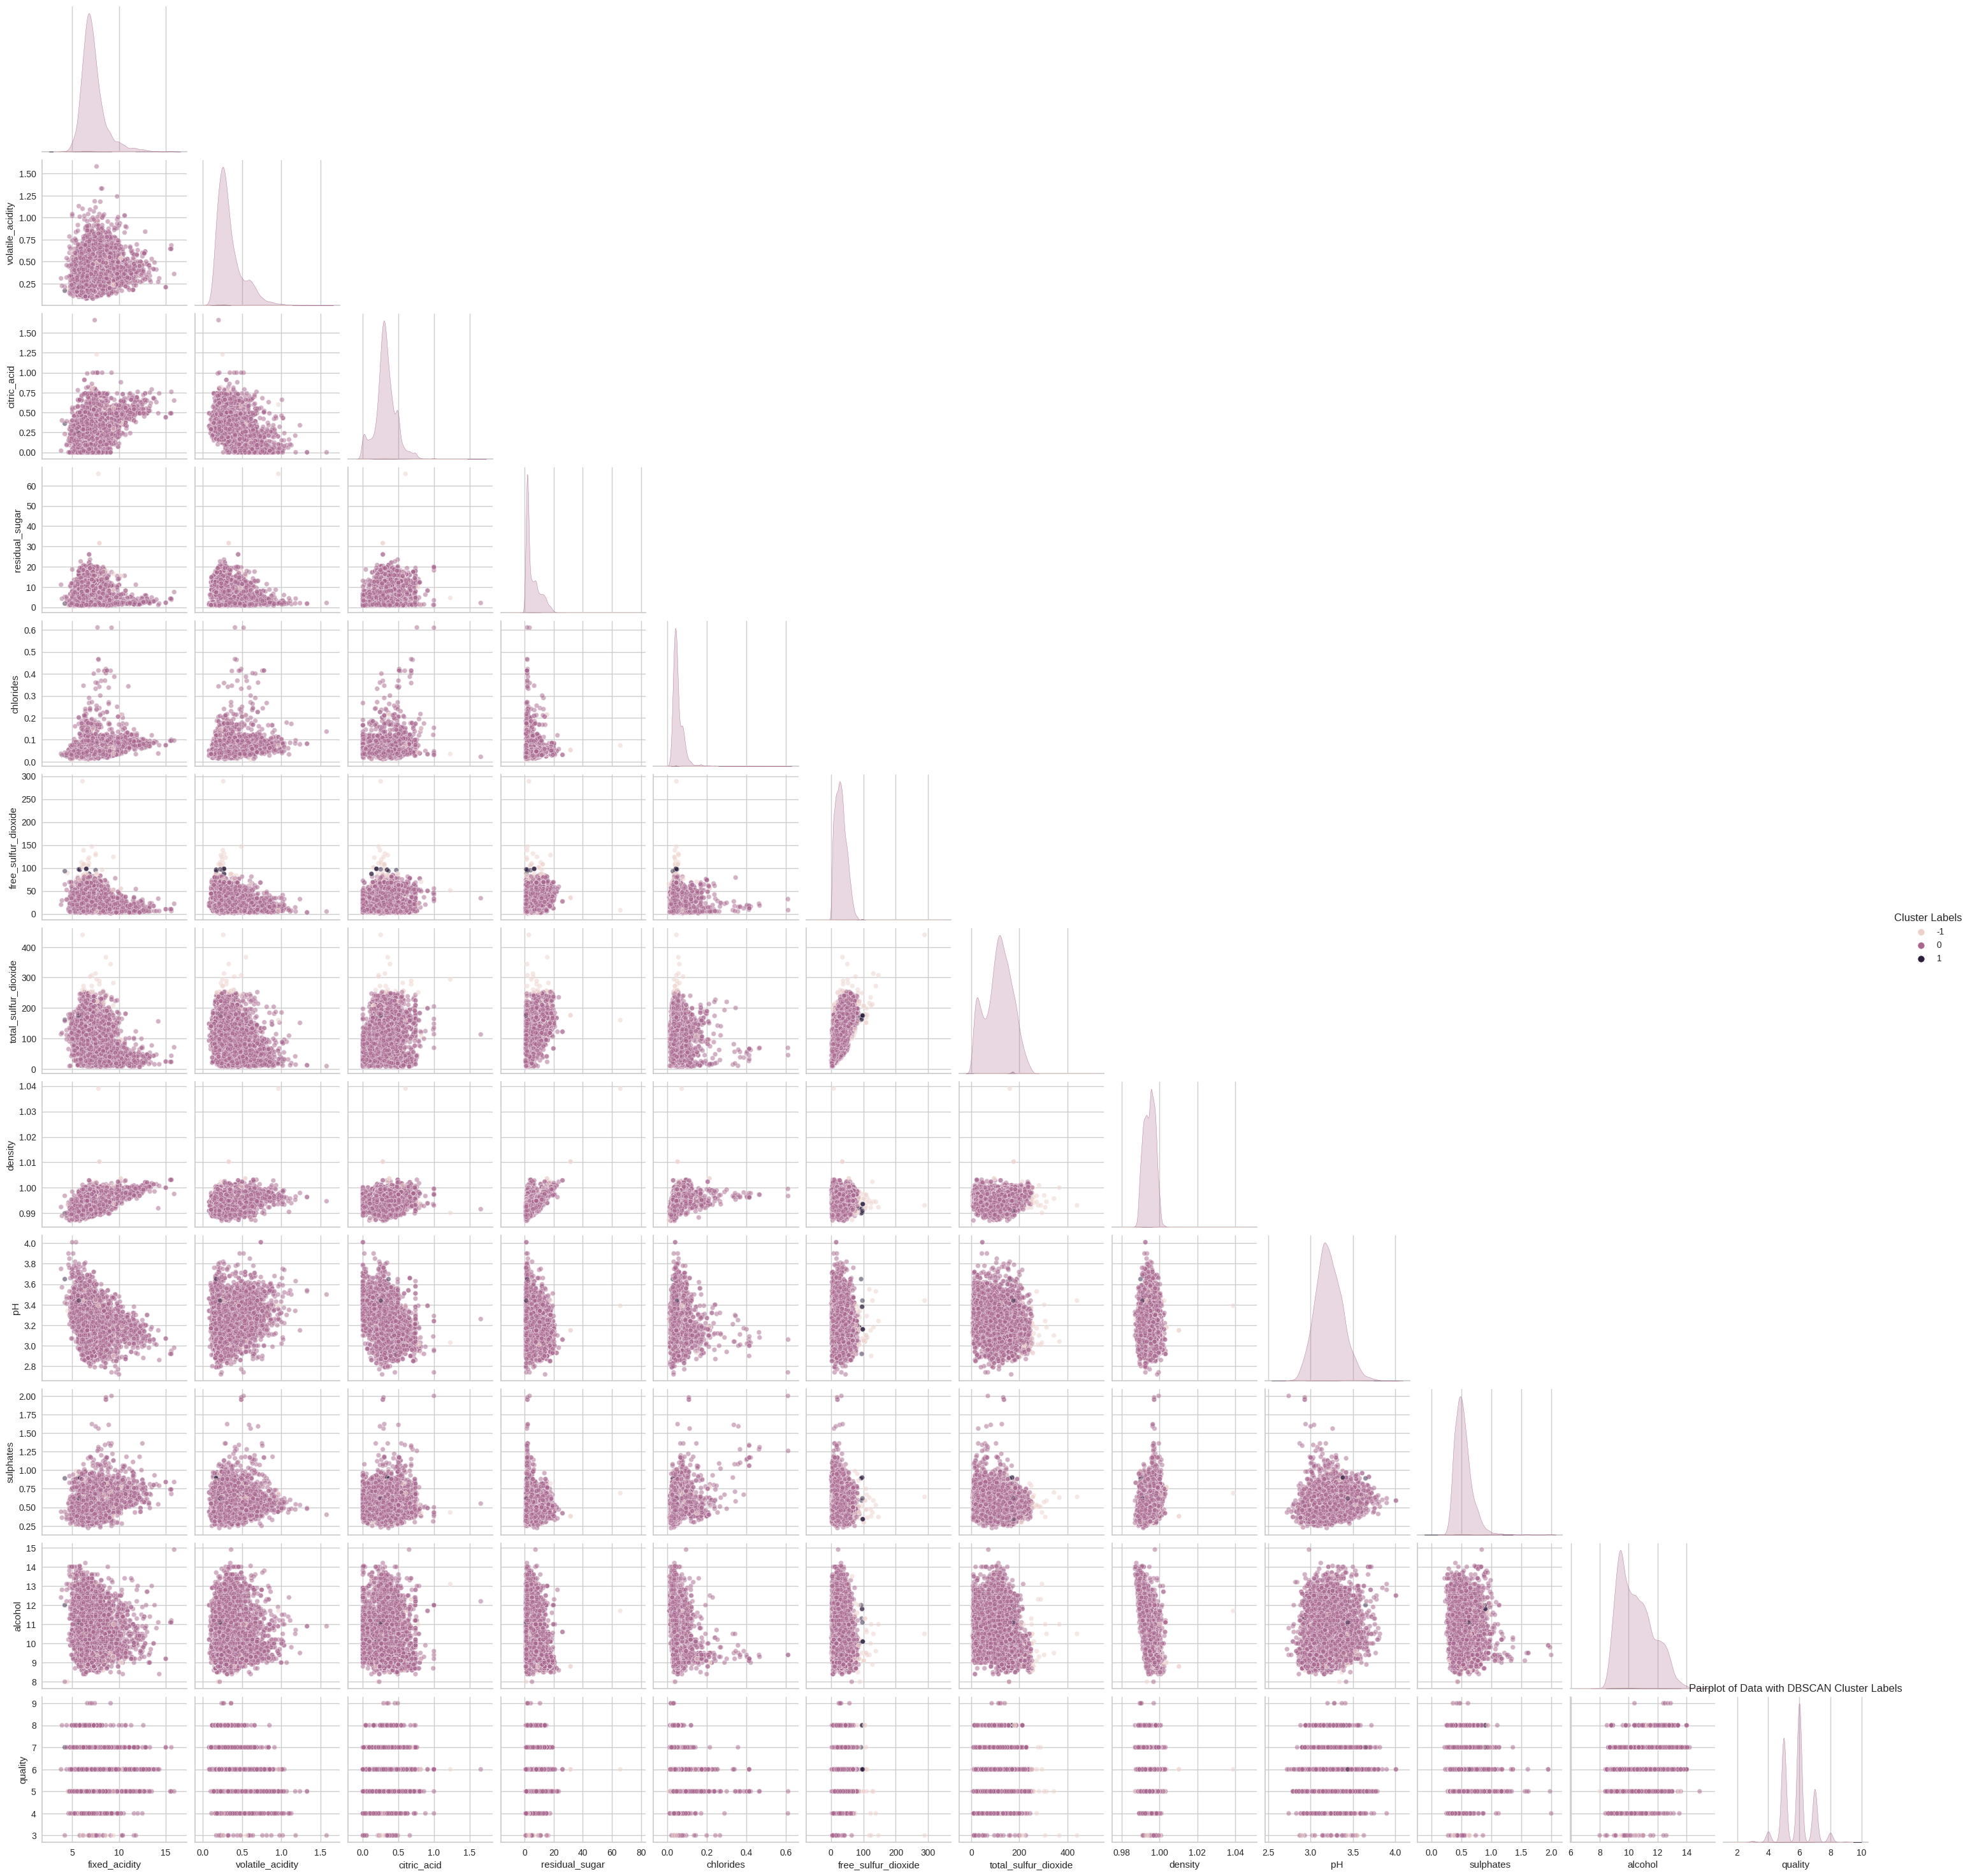

In [75]:
# TODO

# Convert labels to a Pandas Series
labels_series = pd.Series(labels, name='Cluster Labels')

# Concatenate the labels_series with the original dataframe df
df_with_labels = pd.concat([df, labels_series], axis=1)

# Plot the data using seaborn's pairplot with hue as cluster labels
sns.pairplot(df_with_labels, hue='Cluster Labels', diag_kind='kde', plot_kws={'alpha': 0.5, 's': 30}, corner=True)

# Add title to the plot
plt.title("Pairplot of Data with DBSCAN Cluster Labels")

# Show the plot
plt.show()


## 6. Discussion: which clustering algorithm performed the best? Why? (2pt)
 (2-3 sentences)

~ # TODO ~

K-means was pretty simply and and computationally efficient but wasn't the best for this use-case because of it's inability to handle non-spherical data. **I believe Agglomerative Hierarchical Clustering performed the best.** It has the best silhoutte score and given the nature of how it works, it worked perfectly for this use case. It manages data in a very flexible way and can capture more complex cluster structures.